# Librabries 

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

# EDA

In [2]:
bike = pd.read_csv("Seoul_Bike.csv")

DOI
10.24432/C5F62R
License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand


@misc{misc_seoul_bike_sharing_demand_560,
  title        = {{Seoul Bike Sharing Demand}},
  year         = {2020},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C5F62R}
}

In [3]:
bike.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
bike.tail(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
bike.shape

(8760, 14)

In [6]:
bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Changing from categorical to numerical

In [8]:
bike["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [9]:
bike["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [10]:
bike["Functioning Day"].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
bike['Seasons'].replace('Winter', 0, inplace = True)
bike['Seasons'].replace('Spring', 1, inplace = True)
bike['Seasons'].replace('Summer', 2, inplace = True)
bike['Seasons'].replace('Autumn', 3, inplace = True)

In [12]:
bike['Seasons'].tail(2)

8758    3
8759    3
Name: Seasons, dtype: int64

In [13]:
bike["Holiday"].replace('No Holiday', 0, inplace = True)
bike["Holiday"].replace('Holiday', 1, inplace = True)

In [14]:
bike["Holiday"].tail(2)

8758    0
8759    0
Name: Holiday, dtype: int64

In [15]:
bike["Functioning Day"].replace('No', 0, inplace = True)
bike["Functioning Day"].replace('Yes', 1, inplace = True)

In [16]:
bike["Functioning Day"].tail(2)

8758    1
8759    1
Name: Functioning Day, dtype: int64

# Graphics 

sns.histplot(data = bike, y = "Rented Bike Count", x = "Hour")

sns.histplot(data = bike, x = "Holiday")

sns.histplot(data = bike, x = "Functioning Day")

sns.histplot(data = bike, x = "Rented Bike Count")

sns.histplot(data = bike, x = "Temperature(°C)")

sns.histplot(data = bike, x = "Humidity(%)")



sns.histplot(data = bike, x = "Wind speed (m/s)")



sns.histplot(data = bike, x = "Visibility (10m)")

sns.histplot(data = bike, x = "Dew point temperature(°C)")

sns.histplot(data = bike, x = "Solar Radiation (MJ/m2)")


sns.histplot(data = bike, x = "Rainfall(mm)")

sns.histplot(data = bike, x = "Snowfall (cm)")

sns.histplot(data = bike, x = "Seasons")

The bikes have been used equally throughout the seasons 

The seasons have the same amount of observations but the number of rented bikes are different between seasons

bike.head(1)

bike.plot(x = "Temperature(°C)", y = "Rented Bike Count", style = "*")
plt.title("Rented Bike Count vs Temperature(°C)")
plt.xlabel("Temperature(°C)")
plt.ylabel("Rented Bike Count")
plt.show()

bike.plot(x = "Hour", y = "Rented Bike Count", style = "*")
plt.title("Rented Bike Count vs Hour")
plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.show()

sns.histplot(data = bike, x = "Seasons", y = "Rented Bike Count")

('Winter', 0, inplace = True)
('Spring', 1, inplace = True)
('Summer', 2, inplace = True)
('Autumn', 3, inplace = True)

sns.histplot(data = bike, x = "Seasons", y = "Temperature(°C)")

sns.boxplot(data = bike["Rented Bike Count"])

sns.boxplot(data = bike["Temperature(°C)"])

 sns.boxplot(data = bike["Visibility (10m)"])

# Correlation

bike.head(3)

bike_d = bike.drop(["Date"], axis = 1)

bike_d.head(3)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = bike_d.columns
vif_data["VIF"] = [variance_inflation_factor(bike_d.values, i) for i in range(bike_d.shape[1])]
print(vif_data)

corr_matrix = np.corrcoef(bike_d, rowvar = False)

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', 
            xticklabels = range(bike_d.shape[1]), yticklabels = range(bike_d.shape[1]))
plt.title("Feature Correlation Matrix")
plt.show()

The highest correlations are between: 
- Rented Bike Count & Temperature(°C) = 0.54 (0 & 2)
- Temperature(°C) & Dew point temperature(°C) = 0.91 (2 & 6)
- Temperature(°C) & Seasons = 0.59 (2 & 10)
- Humidity(%) & Visibility (10m) = 0.54 (3 & 5)
- Humidity(%) & Dew point temperature(°C) = 0.54 (3 & 6)
- Dew point temperature(°C) & Seasons = 0.58 (6 & 10)

import numpy as np

eigenvalues, _ = np.linalg.eig(corr_matrix)
print("Eigenvalues:", eigenvalues)


condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
print("Condition Number:", condition_number)


def find_highly_correlated_vars(corr_matrix, threshold = 0.5):
    if isinstance(corr_matrix, pd.DataFrame):
        corr_matrix = corr_matrix.values
    rows, cols = np.where(np.abs(corr_matrix) > threshold)
    unique_pairs = set((min(r, c), max(r, c)) for r, c in zip(rows, cols) if r != c)
    return list(unique_pairs)

corr_matrix = bike_d.corr()
highly_corr_vars = find_highly_correlated_vars(corr_matrix, threshold=0.5)

print("Pairs of highly correlated variables:", highly_corr_vars)

bike_d.head(1)

sns.pairplot(bike[["Rented Bike Count", "Temperature(°C)"]])

#sns.pairplot(bike[["Rented Bike Count", "Seasons"]])

sns.pairplot(bike[["Temperature(°C)", "Dew point temperature(°C)"]])

sns.pairplot(bike[["Temperature(°C)", "Seasons"]])

sns.pairplot(bike[["Humidity(%)", "Visibility (10m)"]])

sns.pairplot(bike[["Humidity(%)", "Dew point temperature(°C)"]])

sns.pairplot(bike[["Dew point temperature(°C)", "Seasons"]])

Rented Bike Count & Temperature(°C) = 0.54 (0 & 2)

Temperature(°C) & Dew point temperature(°C) = 0.91 (2 & 6)

Temperature(°C) & Seasons = 0.59 (2 & 10)

Humidity(%) & Visibility (10m) = 0.54 (3 & 5)

Humidity(%) & Dew point temperature(°C) = 0.54 (3 & 6)
Dew point temperature(°C) & Seasons = 0.58 (6 & 10

Multicollinearity

X = bike_d.iloc[:, 1:]  # All rows, columns from index 1 onwards (excluding the first column)
y = bike_d.iloc[:, 0]   # All rows, only the first column

In [17]:
bike_d2 = bike.drop(["Date", "Visibility (10m)", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day"], axis = 1)

In [18]:
bike_d2.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,0.0,0.0,0.0


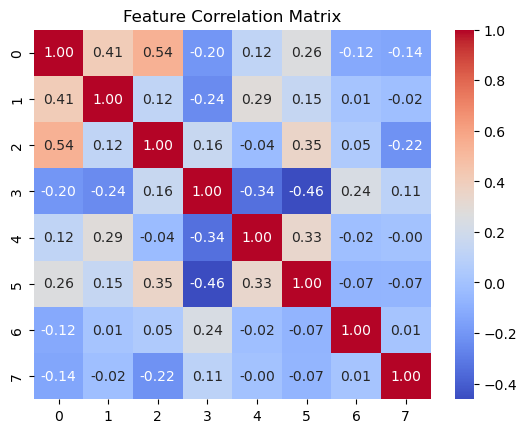

In [19]:
corr_matrix = np.corrcoef(bike_d2, rowvar = False)

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', 
            xticklabels = range(bike_d2.shape[1]), yticklabels = range(bike_d2.shape[1]))
plt.title("Feature Correlation Matrix")
plt.show()

In [20]:
import numpy as np

eigenvalues, _ = np.linalg.eig(corr_matrix)
print("Eigenvalues:", eigenvalues)

Eigenvalues: [2.30501078 1.48845607 0.22373965 0.43508645 0.62660268 0.8840208
 0.96495307 1.07213051]


In [21]:
condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
print("Condition Number:", condition_number)

Condition Number: 3.2097041653301455


In [22]:
def find_highly_correlated_vars(corr_matrix, threshold = 0.5):
    if isinstance(corr_matrix, pd.DataFrame):
        corr_matrix = corr_matrix.values
    rows, cols = np.where(np.abs(corr_matrix) > threshold)
    unique_pairs = set((min(r, c), max(r, c)) for r, c in zip(rows, cols) if r != c)
    return list(unique_pairs)

corr_matrix = bike_d2.corr()
highly_corr_vars = find_highly_correlated_vars(corr_matrix, threshold=0.5)

print("Pairs of highly correlated variables:", highly_corr_vars)

Pairs of highly correlated variables: [(0, 2)]


In [23]:
bike_d2.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,0.0,0.0,0.0


In [24]:
bike_d3 = bike.drop(["Date", 
                     "Humidity(%)", "Wind speed (m/s)", 
                     "Visibility (10m)", "Dew point temperature(°C)",
                     "Solar Radiation (MJ/m2)", "Rainfall(mm)",
                     "Snowfall (cm)",
                     "Seasons", "Holiday", "Functioning Day"], axis = 1)

In [25]:
bike_d3.head(2)

,Rented Bike Count,Hour,Temperature(°C)
0,254,0,-5.2
1,204,1,-5.5


In [26]:
bike_array = bike_d3.values

In [27]:
X = bike_array[:, 1:]

y = bike_array[:, 0]

In [28]:
y

array([254., 204., 173., ..., 694., 712., 584.])

In [29]:
X

array([[ 0. , -5.2],
       [ 1. , -5.5],
       [ 2. , -6. ],
       ...,
       [21. ,  2.6],
       [22. ,  2.1],
       [23. ,  1.9]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [31]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8760, 2), (8760,), (7008, 2), (1752, 2), (7008,), (1752,))

In [32]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled  = scaler.transform(X_test)

X_scaled = scaler.transform(X)

# Models

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_scaled, y_train)

yp_lr = linear_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_lr)
mse_r = mean_squared_error(y_test, yp_lr, squared = False)
r2 = r2_score(y_test, yp_lr)

n = len(y_test)
k = X_train_scaled.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 242817.70559788027
Root Mean Squared Error: 492.76536566390325
R-squared: 0.3991796133882427
Adjusted R-squared: 0.39849256892099083


In [35]:
train_pred = linear_reg.predict(X_train_scaled)
test_pred = linear_reg.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

Training MSE: 246198.12060337863
Validation MSE: 242817.70559788027


## No overfitting but low R2

## 30% Training MSE: 242346.04562180358
Validation MSE: 253067.87962849034

In [36]:
import tensorflow as tf
def huber_loss(y_test, yp_lr, delta=1.0):
    error = y_test - yp_lr
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_lr, delta=1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Mean Huber Loss: 360.61065113969966


In [37]:
score_l = cross_val_score(LinearRegression(), X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_l

0.39460955763442185

In [38]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': yp_lr})
pred.head()

,Actual,Predicted
0,278.0,831.860917
1,96.0,-22.764604
2,215.0,603.995434
3,1290.0,967.730262
4,165.0,718.654236


## Polynomial 2 and 3

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly_features = PolynomialFeatures(degree = 2)

X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

yp_p2 = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, yp_p2)
mse_r = mean_squared_error(y_test, yp_p2, squared = False)
r2 = r2_score(y_test, yp_p2)

n = len(y_test)
k = X_train_scaled.shape[1]  # Number of features
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 220932.85232122723
Root Mean Squared Error: 470.0349479785809
R-squared: 0.4533307963682661
Adjusted R-squared: 0.4527056743515345


In [41]:
score_lp2 = cross_val_score(poly_reg, X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_lp2

0.39460955763442185

In [42]:
pred_p2 = pd.DataFrame({'Actual': y_test, 'Predicted': yp_p2})
pred_p2.head()

,Actual,Predicted
0,278.0,524.901708
1,96.0,205.002854
2,215.0,519.436048
3,1290.0,990.160071
4,165.0,582.496980


train_pred = poly_reg.predict(X_train_poly)
test_pred = poly_reg.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_p2, delta=1.0):
    error = y_test - yp_p2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_p2, delta=1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

## Not overfitting 

In [43]:
degree = 3
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

yp_p3 = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, yp_p3)
r2 = r2_score(y_test, yp_p3)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 202259.78873932717
R-squared: 0.4995348293603358


## Ridge

In [44]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)  # Adjust alpha based on the strength of regularization
ridge_reg.fit(X_train_scaled, y_train)

yp_lnR = ridge_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_lnR)
r2 = r2_score(y_test, yp_lnR)

print(f'Mean Squared Error (Ridge): {mse}')
print(f'R-squared (Ridge): {r2}')

Mean Squared Error (Ridge): 242788.79081971946
R-squared (Ridge): 0.39925115919315257


In [45]:
pred_lnR = pd.DataFrame({'Actual': y_test, 'Predicted': yp_lnR})
pred_lnR.head()

,Actual,Predicted
0,278.0,830.886403
1,96.0,-21.193754
2,215.0,603.804502
3,1290.0,967.492646
4,165.0,719.198340


In [46]:
degree = 2

poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge_reg2 = Ridge(alpha = 10.0) 
ridge_reg2.fit(X_train_poly, y_train)

yp_rp2 = ridge_reg2.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, yp_rp2)
mse_ridge_r = mean_squared_error(y_test, yp_rp2, squared = False)
r2_ridge = r2_score(y_test, yp_rp2)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'Root Mean Squared Error: {mse_ridge_r}')
print(f'R-squared (Ridge): {r2_ridge}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error (Ridge): 223465.61354643287
Root Mean Squared Error: 472.72149681015446
R-squared (Ridge): 0.4470638127692883
Adjusted R-squared: 0.3985641965392853


In [47]:
score_rp2 = cross_val_score(ridge_reg2, X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_rp2

0.38995153345812467

In [48]:
train_pred = ridge_reg2.predict(X_train_poly)
test_pred = ridge_reg2.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_rp2, delta = 1.0):
    error = y_test - yp_rp2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_rp2, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 226873.3318295576
Validation MSE: 223465.61354643287
Mean Huber Loss: 335.1979898962455


## No overfitting but significant difference between R2 and Adjusted R2

## Lasso

In [49]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1.0) 
lasso_reg.fit(X_train_scaled, y_train)

yp_lnL = lasso_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_lnL)
r2 = r2_score(y_test, yp_lnL)

print(f'Mean Squared Error (Lasso): {mse}')
print(f'R-squared (Lasso): {r2}')

Mean Squared Error (Lasso): 242764.9455925631
R-squared (Lasso): 0.39931016106273887


In [50]:
degree = 2

poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
 
lasso_reg = Lasso(alpha = 10.0, max_iter = 100000)
lasso_reg.fit(X_train_poly, y_train)

yp_lp2 = lasso_reg.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, yp_lp2)
r2_lasso = r2_score(y_test, yp_lp2)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')

Mean Squared Error (Lasso): 226845.03330264846
R-squared (Lasso): 0.4387018843034318


# Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state = 12), param_grid, cv = 5, scoring = 'r2')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_best)
mse_r = mean_squared_error(y_test, y_pred_best, squared = False)
r2_best = r2_score(y_test, y_pred_best)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared (Best Model): {r2_best}')
print(f'Adjusted R-squared: {adj_r2}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 100}
Mean Squared Error: 167026.3267661557
Root Mean Squared Error: 408.6885449412005
R-squared (Best Model): 0.5867153839754451
Adjusted R-squared: 0.3986232658781337


In [53]:
score_rf = cross_val_score(RandomForestRegressor(max_depth = 10,
                                              min_samples_leaf = 4, 
                                              n_estimators = 200,
                                              random_state = 12), X_test_scaled, y_test, 
                           cv = 10, scoring = 'r2').mean()
score_rf

0.5410243375530565

In [54]:
pred_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})
pred_rf.head(3)

,Actual,Predicted
0,278.0,338.867429
1,96.0,158.759999
2,215.0,166.600270


In [55]:
train_pred = best_model.predict(X_train_scaled)
test_pred = best_model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, y_pred_best, delta = 1.0):
    error = y_test - y_pred_best
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred_best, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 121619.56725421119
Validation MSE: 167026.3267661557
Mean Huber Loss: 257.91922503534374


## Overfitting here and big difference between R2 and Adjusted R2

# ANN

In [56]:
 !pip install tensorflow
 !pip install keras

In [57]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [58]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

#from keras.layers import Dropout
#model.add(Dropout(0.5)) 

#from keras.regularizers import l1, l2
#model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs = 300, batch_size = 64, validation_split=0.2, callbacks=[early_stopping])

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mse_r = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Epoch 1/300
88/88 [==============================] - 0s 1ms/step - loss: 917322.6250 - val_loss: 925312.8125
Epoch 2/300
88/88 [==============================] - 0s 509us/step - loss: 908341.6250 - val_loss: 889459.5000
Epoch 3/300
88/88 [==============================] - 0s 577us/step - loss: 743071.9375 - val_loss: 523334.6250
Epoch 4/300
88/88 [==============================] - 0s 542us/step - loss: 369757.6250 - val_loss: 326876.5000
Epoch 5/300
88/88 [==============================] - 0s 539us/step - loss: 321977.1875 - val_loss: 322288.9688
Epoch 6/300
88/88 [==============================] - 0s 545us/step - loss: 317416.9688 - val_loss: 317448.9375
Epoch 7/300
88/88 [==============================] - 0s 535us/step - loss: 312687.4375 - val_loss: 312884.1875
Epoch 8/300
88/88 [==============================] - 0s 520us/step - loss: 307883.8750 - val_loss: 307894.6875
Epoch 9/300
88/88 [==============================] - 0s 523us/step - loss: 303169.8125 - val_loss: 302939.6875
Epo

88/88 [==============================] - 0s 522us/step - loss: 234326.8750 - val_loss: 228818.7812
Epoch 75/300
88/88 [==============================] - 0s 490us/step - loss: 233589.5469 - val_loss: 230870.7500
Epoch 76/300
88/88 [==============================] - 0s 484us/step - loss: 234442.9844 - val_loss: 229645.2344
Epoch 77/300
88/88 [==============================] - 0s 515us/step - loss: 233908.9688 - val_loss: 228806.8438
Epoch 78/300
88/88 [==============================] - 0s 502us/step - loss: 233823.3750 - val_loss: 229249.8906
Epoch 79/300
88/88 [==============================] - 0s 498us/step - loss: 233891.8750 - val_loss: 229797.4531
Epoch 80/300
88/88 [==============================] - 0s 512us/step - loss: 233766.7656 - val_loss: 228729.0156
Epoch 81/300
88/88 [==============================] - 0s 496us/step - loss: 233897.1719 - val_loss: 228974.4062
Epoch 82/300
88/88 [==============================] - 0s 506us/step - loss: 234117.9531 - val_loss: 228783.9375
Epoch

Epoch 147/300
88/88 [==============================] - 0s 512us/step - loss: 225289.7500 - val_loss: 218523.3281
Epoch 148/300
88/88 [==============================] - 0s 508us/step - loss: 225177.1875 - val_loss: 218115.2031
Epoch 149/300
88/88 [==============================] - 0s 508us/step - loss: 224574.7188 - val_loss: 217940.5156
Epoch 150/300
88/88 [==============================] - 0s 521us/step - loss: 224335.5938 - val_loss: 217893.8594
Epoch 151/300
88/88 [==============================] - 0s 505us/step - loss: 224035.5312 - val_loss: 217153.6250
Epoch 152/300
88/88 [==============================] - 0s 501us/step - loss: 223758.9062 - val_loss: 216993.1250
Epoch 153/300
88/88 [==============================] - 0s 506us/step - loss: 223552.7812 - val_loss: 215835.0469
Epoch 154/300
88/88 [==============================] - 0s 505us/step - loss: 222931.8906 - val_loss: 215394.1250
Epoch 155/300
88/88 [==============================] - 0s 509us/step - loss: 222421.9375 - val_l

88/88 [==============================] - 0s 511us/step - loss: 187331.0469 - val_loss: 178788.5469
Epoch 220/300
88/88 [==============================] - 0s 507us/step - loss: 186929.9062 - val_loss: 179706.1094
Epoch 221/300
88/88 [==============================] - 0s 522us/step - loss: 186641.4844 - val_loss: 178123.0312
Epoch 222/300
88/88 [==============================] - 0s 507us/step - loss: 186613.2969 - val_loss: 178403.6406
Epoch 223/300
88/88 [==============================] - 0s 503us/step - loss: 186258.0469 - val_loss: 178177.9844
Epoch 224/300
88/88 [==============================] - 0s 506us/step - loss: 186028.0000 - val_loss: 177948.2188
Epoch 225/300
88/88 [==============================] - 0s 508us/step - loss: 185337.6562 - val_loss: 176870.8594
Epoch 226/300
88/88 [==============================] - 0s 496us/step - loss: 185291.8438 - val_loss: 176506.4688
Epoch 227/300
88/88 [==============================] - 0s 514us/step - loss: 184259.6094 - val_loss: 176404.79

88/88 [==============================] - 0s 486us/step - loss: 177284.8594 - val_loss: 169095.5938
Epoch 292/300
88/88 [==============================] - 0s 503us/step - loss: 176370.2812 - val_loss: 175068.3281
Epoch 293/300
88/88 [==============================] - 0s 507us/step - loss: 178370.7188 - val_loss: 169078.2812
Epoch 294/300
88/88 [==============================] - 0s 498us/step - loss: 177162.0469 - val_loss: 169881.4844
Epoch 295/300
88/88 [==============================] - 0s 501us/step - loss: 177268.9062 - val_loss: 170756.9688
Epoch 296/300
88/88 [==============================] - 0s 509us/step - loss: 176891.1094 - val_loss: 170104.6094
Epoch 297/300
88/88 [==============================] - 0s 498us/step - loss: 176934.8594 - val_loss: 168797.0469
Epoch 298/300
88/88 [==============================] - 0s 499us/step - loss: 177154.3750 - val_loss: 169672.0938
Epoch 299/300
88/88 [==============================] - 0s 500us/step - loss: 177298.4062 - val_loss: 168452.95

In [59]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 182160.89778748312
Root Mean Squared Error: 426.80311361034273
R-squared: 0.5492668841230668
Adjusted R-squared: 0.5487514660374442


In [60]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, y_pred, delta = 1.0):
    error = y_test - y_pred
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred, delta = 1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

55/55 [==============================] - 0s 234us/step
Training MSE: 175837.1534937032
Validation MSE: 182160.89778748312
Huber Loss: [[ 84.10565186 266.10565186 147.10565186 ... 398.89434814  74.10565186
  108.10565186]
 [115.5806427   65.4193573   52.5806427  ... 599.5806427  125.5806427
   91.5806427 ]
 [ 97.43060303  83.56939697  34.43060303 ... 581.43060303 107.43060303
   73.43060303]
 ...
 [653.83374023 835.83374023 716.83374023 ... 169.83374023 643.83374023
  677.83374023]
 [171.47569275   9.52430725 108.47569275 ... 655.47569275 181.47569275
  147.47569275]
 [232.24658203 414.24658203 295.24658203 ... 250.75341797 222.24658203
  256.24658203]]
Mean Huber Loss: 627.0388039451589


## 30% Training MSE: 190473.52005780334
Validation MSE: 200931.60889353

In [61]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

#from keras.layers import Dropout
#model.add(Dropout(0.5)) 

#from keras.regularizers import l1, l2
#model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs = 300, batch_size = 64, validation_split=0.3, callbacks=[early_stopping])

mse = mean_squared_error(y_test, y_pred)
mse_r = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Epoch 1/300
77/77 [==============================] - 0s 1ms/step - loss: 919380.3125 - val_loss: 918245.1250
Epoch 2/300
77/77 [==============================] - 0s 612us/step - loss: 917919.0000 - val_loss: 911409.9375
Epoch 3/300
77/77 [==============================] - 0s 610us/step - loss: 847333.5625 - val_loss: 686914.8750
Epoch 4/300
77/77 [==============================] - 0s 639us/step - loss: 438707.3750 - val_loss: 321354.1250
Epoch 5/300
77/77 [==============================] - 0s 593us/step - loss: 322707.1875 - val_loss: 315309.5625
Epoch 6/300
77/77 [==============================] - 0s 611us/step - loss: 316903.1250 - val_loss: 309393.0312
Epoch 7/300
77/77 [==============================] - 0s 609us/step - loss: 311280.2500 - val_loss: 303289.5625
Epoch 8/300
77/77 [==============================] - 0s 584us/step - loss: 305306.5312 - val_loss: 297312.5938
Epoch 9/300
77/77 [==============================] - 0s 592us/step - loss: 299310.8125 - val_loss: 290851.5625
Epo

77/77 [==============================] - 0s 553us/step - loss: 235910.3906 - val_loss: 221140.8594
Epoch 75/300
77/77 [==============================] - 0s 557us/step - loss: 236159.9531 - val_loss: 221437.1250
Epoch 76/300
77/77 [==============================] - 0s 563us/step - loss: 235997.1406 - val_loss: 221276.9219
Epoch 77/300
77/77 [==============================] - 0s 571us/step - loss: 235944.8438 - val_loss: 223626.0938
Epoch 78/300
77/77 [==============================] - 0s 559us/step - loss: 236000.8125 - val_loss: 221809.3906
Epoch 79/300
77/77 [==============================] - 0s 565us/step - loss: 235978.1875 - val_loss: 221223.4688
Epoch 80/300
77/77 [==============================] - 0s 571us/step - loss: 235703.7344 - val_loss: 220530.2500
Epoch 81/300
77/77 [==============================] - 0s 558us/step - loss: 235540.9219 - val_loss: 220557.6875
Epoch 82/300
77/77 [==============================] - 0s 563us/step - loss: 235482.7031 - val_loss: 220269.1406
Epoch

Epoch 147/300
77/77 [==============================] - 0s 556us/step - loss: 217899.3906 - val_loss: 199991.5156
Epoch 148/300
77/77 [==============================] - 0s 568us/step - loss: 217393.0781 - val_loss: 199684.1406
Epoch 149/300
77/77 [==============================] - 0s 554us/step - loss: 217121.4844 - val_loss: 201003.7188
Epoch 150/300
77/77 [==============================] - 0s 550us/step - loss: 217530.6562 - val_loss: 198532.9688
Epoch 151/300
77/77 [==============================] - 0s 567us/step - loss: 216061.9688 - val_loss: 197825.0625
Epoch 152/300
77/77 [==============================] - 0s 558us/step - loss: 215541.7031 - val_loss: 197673.4531
Epoch 153/300
77/77 [==============================] - 0s 552us/step - loss: 214863.4219 - val_loss: 197287.5312
Epoch 154/300
77/77 [==============================] - 0s 566us/step - loss: 214260.9219 - val_loss: 196594.3594
Epoch 155/300
77/77 [==============================] - 0s 573us/step - loss: 214183.6094 - val_l

77/77 [==============================] - 0s 537us/step - loss: 185600.4062 - val_loss: 168128.7188
Epoch 220/300
77/77 [==============================] - 0s 547us/step - loss: 185064.6875 - val_loss: 168428.3750
Epoch 221/300
77/77 [==============================] - 0s 569us/step - loss: 185758.8281 - val_loss: 167194.3750
Epoch 222/300
77/77 [==============================] - 0s 567us/step - loss: 185116.3594 - val_loss: 166972.7188
Epoch 223/300
77/77 [==============================] - 0s 558us/step - loss: 185012.3125 - val_loss: 167428.7500
Epoch 224/300
77/77 [==============================] - 0s 559us/step - loss: 184553.0156 - val_loss: 166910.3438
Epoch 225/300
77/77 [==============================] - 0s 566us/step - loss: 184566.3906 - val_loss: 167524.0625
Epoch 226/300
77/77 [==============================] - 0s 555us/step - loss: 184202.1719 - val_loss: 167823.1406
Epoch 227/300
77/77 [==============================] - 0s 569us/step - loss: 184961.5938 - val_loss: 166473.07

77/77 [==============================] - 0s 554us/step - loss: 180298.5469 - val_loss: 162437.3750
Epoch 292/300
77/77 [==============================] - 0s 556us/step - loss: 180300.7344 - val_loss: 162357.6250
Epoch 293/300
77/77 [==============================] - 0s 555us/step - loss: 179470.9219 - val_loss: 162535.8281
Epoch 294/300
77/77 [==============================] - 0s 565us/step - loss: 179418.4688 - val_loss: 163126.6719
Epoch 295/300
77/77 [==============================] - 0s 568us/step - loss: 180049.2812 - val_loss: 162586.7969
Epoch 296/300
77/77 [==============================] - 0s 559us/step - loss: 180410.2344 - val_loss: 161979.6719
Epoch 297/300
77/77 [==============================] - 0s 568us/step - loss: 179504.7344 - val_loss: 161869.6406
Epoch 298/300
77/77 [==============================] - 0s 544us/step - loss: 179465.7031 - val_loss: 162539.1094
Epoch 299/300
77/77 [==============================] - 0s 558us/step - loss: 181011.5781 - val_loss: 162461.29

In [62]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 182160.89778748312
Root Mean Squared Error: 426.80311361034273
R-squared: 0.5492668841230668
Adjusted R-squared: 0.5487514660374442


In [63]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, y_pred, delta = 1.0):
    error = y_test - y_pred
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred, delta = 1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

55/55 [==============================] - 0s 261us/step
Training MSE: 174220.74619443633
Validation MSE: 179539.4143288872
Huber Loss: [[ 84.10565186 266.10565186 147.10565186 ... 398.89434814  74.10565186
  108.10565186]
 [115.5806427   65.4193573   52.5806427  ... 599.5806427  125.5806427
   91.5806427 ]
 [ 97.43060303  83.56939697  34.43060303 ... 581.43060303 107.43060303
   73.43060303]
 ...
 [653.83374023 835.83374023 716.83374023 ... 169.83374023 643.83374023
  677.83374023]
 [171.47569275   9.52430725 108.47569275 ... 655.47569275 181.47569275
  147.47569275]
 [232.24658203 414.24658203 295.24658203 ... 250.75341797 222.24658203
  256.24658203]]
Mean Huber Loss: 627.0388039451589


## No overfitting 


## 30% Training MSE: 167561.7460854632
Validation MSE: 182676.4375581989

# SVM

In [64]:
from sklearn import svm

In [65]:
regressor = svm.SVR(kernel = 'linear', C = 5.0, epsilon = 2.5)

regressor.fit(X_train_scaled, y_train)

yp_svm = regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_svm)
mse_r = mean_squared_error(y_test, yp_svm, squared = False)
r2 = r2_score(y_test, yp_svm)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 260812.0098650761
Root Mean Squared Error: 510.6975718221853
R-squared: 0.35465508079698926
Adjusted R-squared: 0.3539171220557623


In [66]:
score_svm = cross_val_score(svm.SVR(kernel = 'linear', C = 5.0, epsilon = 2.5), 
                            X_test_scaled, y_test, cv = 10, scoring = 'r2').mean()
score_svm

0.22382072257431407

In [67]:
pred_svm = pd.DataFrame({'Actual': y_test, 'Predicted': yp_svm})
pred_svm.head()

,Actual,Predicted
0,278.0,715.132368
1,96.0,83.647308
2,215.0,545.293195
3,1290.0,799.546194
4,165.0,614.944886


In [68]:
regressor = svm.SVR(kernel = 'poly', C = 50.0, epsilon = 3.5, degree = 2)

regressor.fit(X_train_scaled, y_train)

yp_svm_p2 = regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_svm_p2)
mse_r = mean_squared_error(y_test, yp_svm_p2, squared = False)
r2 = r2_score(y_test, yp_svm_p2)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 226015.57144926663
Root Mean Squared Error: 475.4109500729518
R-squared: 0.44075427825963653
Adjusted R-squared: 0.44011477486142003


In [69]:
score_svr = cross_val_score(svm.SVR(kernel = 'poly', C = 50.0, epsilon = 3.5, degree = 2), 
                            X_test_scaled, y_test, cv = 10, scoring = 'r2').mean()
score_svr

0.43712128689851515

In [70]:
train_pred = regressor.predict(X_train_scaled)
test_pred = regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_svm_p2, delta = 1.0):
    error = y_test - yp_svm_p2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_svm_p2, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 230861.0609871089
Validation MSE: 226015.57144926663
Mean Huber Loss: 332.35711018672214


## No overfitting 

## 30% Training MSE: 228137.12938671483
Validation MSE: 234311.1493008199

# KNN

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}  # Adjust the range based on your data
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
#knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
#knn_regressor.fit(X_train, y_train)

best_k

9

In [73]:
knn_regressor = KNeighborsRegressor(n_neighbors = 9, metric='manhattan') 

knn_regressor.fit(X_train_scaled, y_train)

yp_knn = knn_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_knn)
mse_r = mean_squared_error(y_test, yp_knn, squared = False)
r2 = r2_score(y_test, yp_knn)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 171021.93224674446
Root Mean Squared Error: 413.5479805859829
R-squared: 0.5768287852050449
Adjusted R-squared: 0.5763448844448449


In [74]:
score_knn = cross_val_score(KNeighborsRegressor(n_neighbors = 9), 
                            X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_knn

0.566962709582967

In [75]:
pred_knn = pd.DataFrame({'Actual': y_test, 'Predicted': yp_knn})
pred_knn.head()

,Actual,Predicted
0,278.0,328.333333
1,96.0,139.777778
2,215.0,172.888889
3,1290.0,997.000000
4,165.0,421.666667


In [76]:
train_pred = knn_regressor.predict(X_train_scaled)
test_pred = knn_regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_knn, delta = 1.0):
    error = y_test - yp_knn
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_knn, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 137710.31506144654
Validation MSE: 171021.93224674446
Mean Huber Loss: 262.4580549918259


## Overfitting here

In [77]:
from sklearn.ensemble import BaggingRegressor

bagging_regressor = BaggingRegressor(KNeighborsRegressor(n_neighbors = 4), n_estimators = 10, random_state=12)
bagging_regressor.fit(X_train_scaled, y_train)


yp_knn_bgg = bagging_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_knn_bgg)
mse_r = mean_squared_error(y_test, yp_knn_bgg, squared = False)
r2 = r2_score(y_test, yp_knn_bgg)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 193217.9620947489
Root Mean Squared Error: 439.5656516320957
R-squared: 0.5219076368411402
Adjusted R-squared: 0.5213609331668589


In [78]:
score_knn_bgg = cross_val_score(BaggingRegressor(KNeighborsRegressor(n_neighbors = 4), n_estimators = 10, random_state=12), 
                            X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_knn_bgg

0.5459766094983227

In [79]:
train_pred = bagging_regressor.predict(X_train_scaled)
test_pred = bagging_regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_knn_bgg, delta = 1.0):
    error = y_test - yp_knn_bgg
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_knn_bgg, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 112665.32327491797
Validation MSE: 193217.9620947489
Mean Huber Loss: 274.4220692422945


## Overfitting here

# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_params

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [82]:
tree_regressor = DecisionTreeRegressor(
    max_depth = 10,
    min_samples_split = 10,
    min_samples_leaf = 4,
    random_state = 12
)

tree_regressor.fit(X_train_scaled, y_train)

yp_dt = tree_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_dt)
mse_r = mean_squared_error(y_test, yp_dt, squared = False)
r2 = r2_score(y_test, yp_dt)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 181200.42440230845
Root Mean Squared Error: 425.67643157956076
R-squared: 0.5516434488352242
Adjusted R-squared: 0.551130748376488


In [83]:
score_dt = cross_val_score(DecisionTreeRegressor(max_depth = 10, min_samples_split = 10, 
                                                 min_samples_leaf = 4, random_state = 12), 
X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()

score_dt

0.4731598280110855

In [84]:
pred_dt = pd.DataFrame({'Actual': y_test, 'Predicted': yp_dt})
pred_dt.head()

,Actual,Predicted
0,278.0,334.317647
1,96.0,168.857143
2,215.0,109.500000
3,1290.0,1306.000000
4,165.0,574.833333


In [85]:
train_pred = tree_regressor.predict(X_train_scaled)
test_pred = tree_regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_dt, delta = 1.0):
    error = y_test - yp_dt
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_dt, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 126603.5474418591
Validation MSE: 181200.42440230845
Mean Huber Loss: 267.1467770341865


## Overfitting here

# Summary

In [86]:
print("R2 LN:", r2_score(y_test, yp_lr))

print("R2 LNP2:", r2_score(y_test, yp_p2))

print("R2 RP2:", r2_score(y_test, yp_rp2))

print("R2 RF:", r2_score(y_test, y_pred_best))

print("R2 SVM:", r2_score(y_test, yp_svm))

print("R2 SVR:", r2_score(y_test, yp_svm_p2))

print("R2 KNN:", r2_score(y_test, yp_knn))

print("R2 KNN BGG:", r2_score(y_test, yp_knn_bgg))

print("R2 DT:", r2_score(y_test, yp_dt))

R2 LN: 0.3991796133882427
R2 LNP2: 0.4533307963682661
R2 RP2: 0.4470638127692883
R2 RF: 0.5867153839754451
R2 SVM: 0.35465508079698926
R2 SVR: 0.44075427825963653
R2 KNN: 0.5768287852050449
R2 KNN BGG: 0.5219076368411402
R2 DT: 0.5516434488352242


## 10 %

R2 LN: 0.38074734896171947
R2 LNP2: 0.437375128022336
R2 RP2: 0.43158689283648877
R2 RF: 0.5731908439376762
R2 SVM: 0.35080947923018724
R2 SVR: 0.4270188162339221
R2 KNN: 0.5503845902353699
R2 KNN BGG: 0.5354262824282361
R2 DT: 0.5445850330737287

## 20 %

R2 LN: 0.3991796133882427
R2 LNP2: 0.4533307963682661
R2 RP2: 0.4470638127692883
R2 RF: 0.5867153839754451
R2 SVM: 0.35465508079698926
R2 SVR: 0.44075427825963653
R2 KNN: 0.5768287852050449
R2 KNN BGG: 0.5219076368411402
R2 DT: 0.5516434488352242

## 30%

R2 LN: 0.39912159290211624
R2 LNP2: 0.4580627201369608
R2 RP2: 0.44855675534225115
R2 RF: 0.5818660606458415
R2 SVM: 0.34350975005476103
R2 SVR: 0.44365713118615513
R2 KNN: 0.5712481683582395
R2 KNN BGG: 0.5414348406777505
R2 DT: 0.5362274954131457

In [87]:
print("Cross Validation LN:", score_l) #yp_lr

print("Cross Validation LNP2:", score_lp2) #yp_p2

print("Cross Validation RP2:", score_rp2) #yp_rp2

print("Cross Validation RF:", score_rf) #y_pred_best

#ANN y_pred

print("Cross Validation SVM:", score_svm) #yp_svm

print("Cross Validation SVR:", score_svr) #yp_svm_p2

print("Cross Validation KNN:", score_knn) #yp_knn

print("Cross Validation KNN BGG:", score_knn_bgg)  #yp_knn_bgg

print("Cross Validation DT:", score_dt) #yp_dt




Cross Validation LN: 0.39460955763442185
Cross Validation LNP2: 0.39460955763442185
Cross Validation RP2: 0.38995153345812467
Cross Validation RF: 0.5410243375530565
Cross Validation SVM: 0.22382072257431407
Cross Validation SVR: 0.43712128689851515
Cross Validation KNN: 0.566962709582967
Cross Validation KNN BGG: 0.5459766094983227
Cross Validation DT: 0.4731598280110855
